<a href="https://colab.research.google.com/github/Kowsalyasriganesh/zeotap/blob/main/Kowsalya_SriGanesh_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None 

       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%    

<ipython-input-3-cfe1080b27a9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


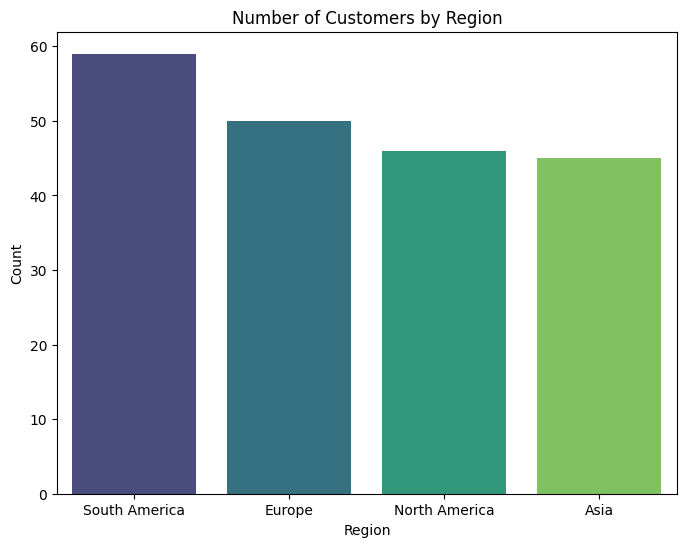

<ipython-input-3-cfe1080b27a9>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=signup_trend.index, y=signup_trend.values, marker='o', palette='coolwarm')


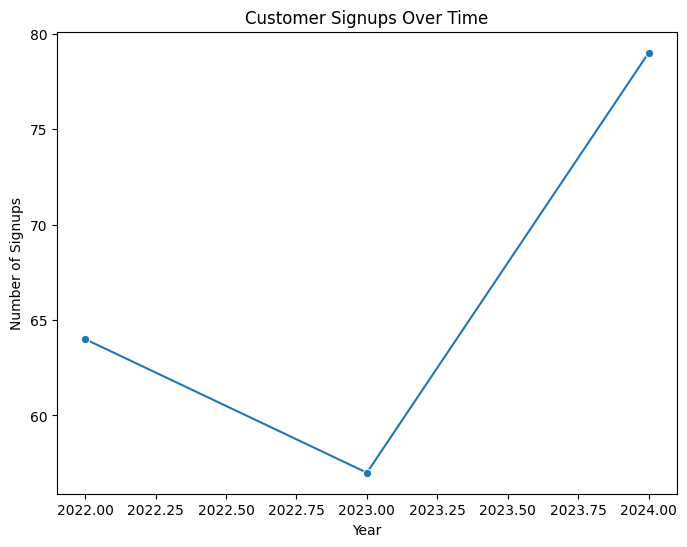

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN   

<ipython-input-3-cfe1080b27a9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')


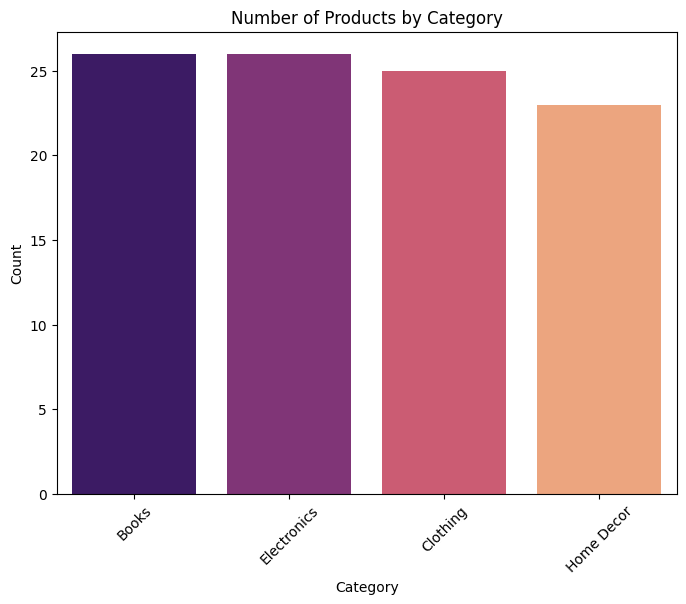

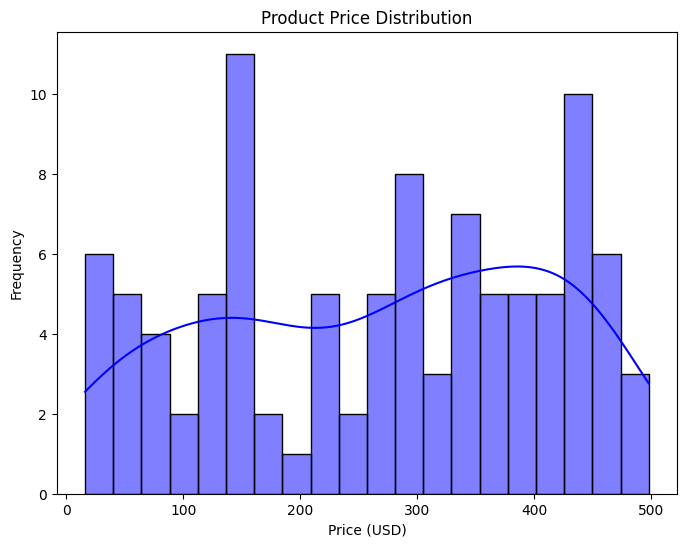

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None 

       TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00001      C0109      P059                            NaN   
fre

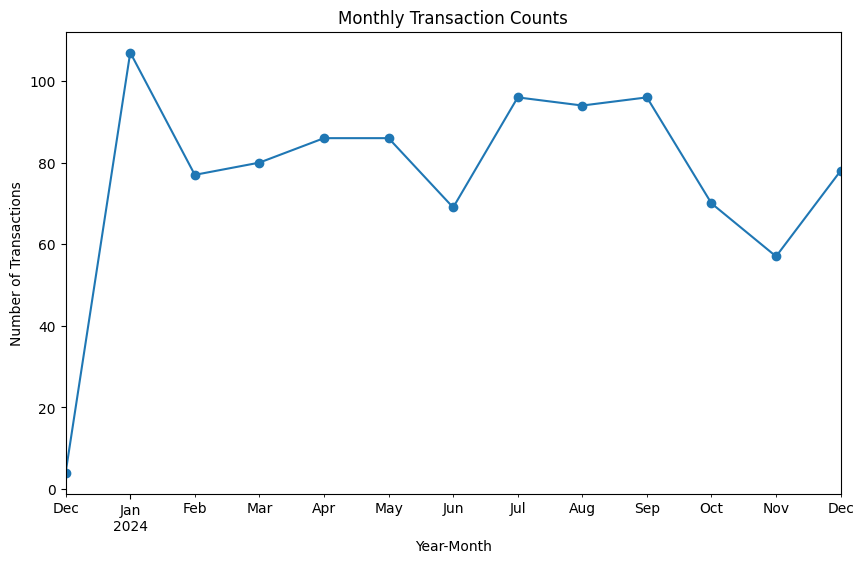

<ipython-input-3-cfe1080b27a9>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_product_names, palette='coolwarm')


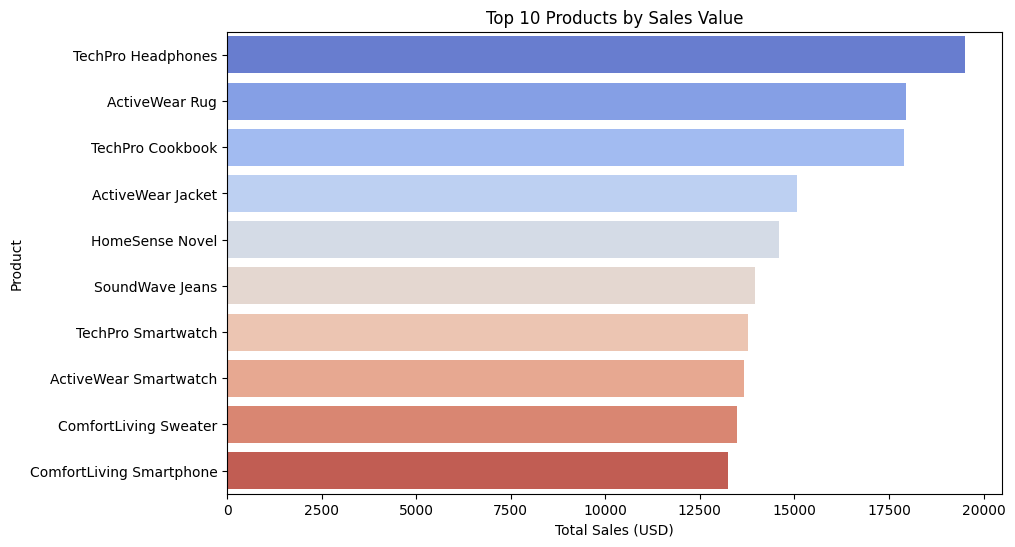

<ipython-input-3-cfe1080b27a9>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spending.index, y=avg_spending.values, palette='magma')


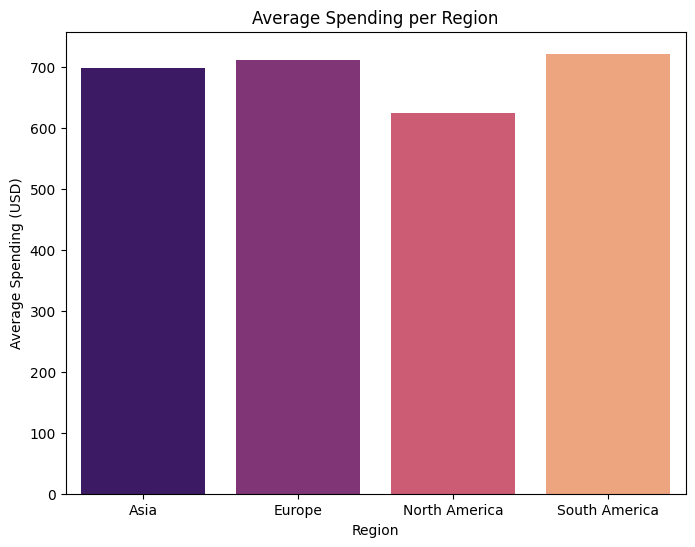

In [3]:
# Convert dates to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# --- Task 1: Exploratory Data Analysis (EDA) ---

def perform_eda():
    # EDA for Customers Dataset
    print("Customers Dataset:")
    print(customers_df.info(), "\n")
    print(customers_df.describe(include='all'), "\n")

    region_counts = customers_df['Region'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
    plt.title('Number of Customers by Region')
    plt.ylabel('Count')
    plt.xlabel('Region')
    plt.show()

    signup_trend = customers_df['SignupDate'].dt.year.value_counts().sort_index()
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=signup_trend.index, y=signup_trend.values, marker='o', palette='coolwarm')
    plt.title('Customer Signups Over Time')
    plt.ylabel('Number of Signups')
    plt.xlabel('Year')
    plt.show()

    # EDA for Products Dataset
    print("Products Dataset:")
    print(products_df.info(), "\n")
    print(products_df.describe(include='all'), "\n")

    category_counts = products_df['Category'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')
    plt.title('Number of Products by Category')
    plt.ylabel('Count')
    plt.xlabel('Category')
    plt.xticks(rotation=45)
    plt.show()

    price_distribution = products_df['Price']
    plt.figure(figsize=(8, 6))
    sns.histplot(price_distribution, bins=20, kde=True, color='blue')
    plt.title('Product Price Distribution')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.show()

    # EDA for Transactions Dataset
    print("Transactions Dataset:")
    print(transactions_df.info(), "\n")
    print(transactions_df.describe(include='all'), "\n")

    transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
    monthly_transactions = transactions_df.groupby('YearMonth').size()
    plt.figure(figsize=(10, 6))
    monthly_transactions.plot(kind='line', marker='o', title='Monthly Transaction Counts')
    plt.ylabel('Number of Transactions')
    plt.xlabel('Year-Month')
    plt.show()

    top_products = transactions_df.groupby('ProductID')['TotalValue'].sum().nlargest(10)
    top_product_names = products_df.set_index('ProductID').loc[top_products.index, 'ProductName']
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_products.values, y=top_product_names, palette='coolwarm')
    plt.title('Top 10 Products by Sales Value')
    plt.xlabel('Total Sales (USD)')
    plt.ylabel('Product')
    plt.show()

    avg_spending = transactions_df.merge(customers_df, on='CustomerID').groupby('Region')['TotalValue'].mean()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=avg_spending.index, y=avg_spending.values, palette='magma')
    plt.title('Average Spending per Region')
    plt.ylabel('Average Spending (USD)')
    plt.xlabel('Region')
    plt.show()

perform_eda()

In [7]:
def insights():
    # Merging datasets for insights
    merged = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

    # Business Insights
    print("\n--- Business Insights ---")
    insights = []

    # 1. Top-selling products
    top_products = merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
    insights.append(f"Top 5 products by sales volume: {top_products.to_dict()}")

    # 2. Revenue by region
    revenue_by_region = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    insights.append(f"Revenue distribution by region: {revenue_by_region.to_dict()}")

    # 3. Monthly sales trend
    merged['TransactionMonth'] = pd.to_datetime(merged['TransactionDate']).dt.to_period('M')
    monthly_sales = merged.groupby('TransactionMonth')['TotalValue'].sum()
    insights.append(f"Monthly sales trend shows peaks in: {monthly_sales.idxmax()} with value {monthly_sales.max()}")

    # 4. Most valuable customers
    top_customers = merged.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
    insights.append(f"Top 5 customers by revenue: {top_customers.to_dict()}")

    # 5. Category contribution
    category_revenue = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    insights.append(f"Category contribution to revenue: {category_revenue.to_dict()}")

    for i, insight in enumerate(insights, 1):
        print(f"Insight {i}: {insight}")
insights()


--- Business Insights ---
Insight 1: Top 5 products by sales volume: {'ActiveWear Smartwatch': 100, 'SoundWave Headphones': 97, 'HomeSense Desk Lamp': 81, 'ActiveWear Rug': 79, 'SoundWave Cookbook': 78}
Insight 2: Revenue distribution by region: {'South America': 219352.56, 'Europe': 166254.63, 'North America': 152313.4, 'Asia': 152074.97}
Insight 3: Monthly sales trend shows peaks in: 2024-07 with value 71366.39
Insight 4: Top 5 customers by revenue: {'Paul Parsons': 10673.869999999999, 'Bruce Rhodes': 8040.389999999999, 'Gerald Hines': 7663.7, 'William Adams': 7634.45, 'Aimee Taylor': 7572.91}
Insight 5: Category contribution to revenue: {'Books': 192147.47, 'Electronics': 180783.5, 'Clothing': 166170.66, 'Home Decor': 150893.93}
